In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-07-13 13:23:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  3.99MB/s    in 26s     

2021-07-13 13:23:59 (2.56 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [7]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [10]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [14]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangn berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangn berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [21]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=4,
    class_mode='binary') #klasifikasi kelas 2 menggunakan class_mode binary

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=4,
    class_mode='binary') #klasifikasi kelas 2 menggunakan class_mode binary

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7399 - accuracy: 0.4500 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 9s - loss: 0.6970 - accuracy: 0.5500 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 7s - loss: 0.6961 - accuracy: 0.4900 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 7s - loss: 0.6998 - accuracy: 0.4400 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 0.6889 - accuracy: 0.5400 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 7s - loss: 0.7119 - accuracy: 0.5800 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 7s - loss: 0.7152 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 7s - loss: 0.6950 - accuracy: 0.5300 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 7s - loss: 0.6926 - accuracy: 0.5100 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 7s - loss: 0.6915 - accuracy: 0.5400 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

Saving 6.png to 6.png
6.png
clean


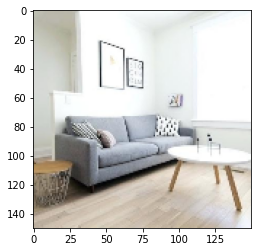

In [30]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')